In [94]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Graphics Libs
import matplotlib.pyplot as plt

# nlp libraries
import spacy
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from spacy.lang.it.stop_words import STOP_WORDS
from spacy.lang.it import Italian

# models
from sklearn import svm

In [95]:
DATA_PATH = 'datasets/dankmemes_task1_train.csv'
data = pd.read_csv(DATA_PATH)
data.head()

,File,Engagement,Date,Manipulation,Visual,Text,Meme
0,0.jpg,11,2019-08-12,1,Salvini,satira cruda votaci.. saremo di parola il part...,1
1,1.jpg,2261,2019-08-21,0,0,"peccato per le accise, dai. c'eravamo quasi.",0
2,2.jpg,1327,2019-08-23,0,"Salvini, Di Maio","""che c'è ancora?"" ""aspetto un bambino""",1
3,3.jpg,18,2019-08-27,0,0,ora in onda speciale gr1 ascolta la diretta se...,0
4,4.jpg,617,2019-08-25,0,"Salvini, Di Maio",sta sciocchezza che sto pe fa e solo colpa tua,1


In [96]:
data.describe()

,Engagement,Manipulation,Meme
count,1600.000000,1600.000000,1600.00000
mean,410.330625,0.205000,0.49750
std,1987.871324,0.403828,0.50015
min,0.000000,0.000000,0.00000
25%,14.000000,0.000000,0.00000
50%,38.000000,0.000000,0.00000
75%,163.000000,0.000000,1.00000
max,38994.000000,1.000000,1.00000


In [97]:
data.dtypes

File            object
Engagement       int64
Date            object
Manipulation     int64
Visual          object
Text            object
Meme             int64
dtype: object

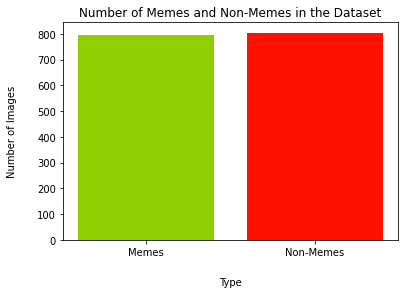

In [98]:
# Count the number of memes and non-memes
number_of_memes = data['Meme'].sum()
number_of_non_memes = len(data) - number_of_memes



# Create the bar plot
plt.bar(['Memes', 'Non-Memes'], [number_of_memes, number_of_non_memes], color=['#8fce00', '#ff1100'])

# Set labels and title
plt.xlabel('Type', labelpad=20)
plt.ylabel('Number of Images', labelpad=20)
plt.title('Number of Memes and Non-Memes in the Dataset')

# Show the plot
plt.show()

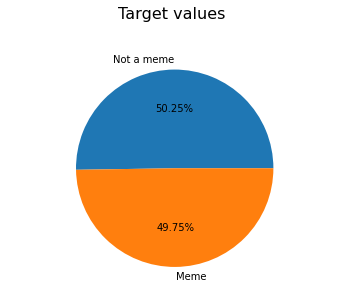

In [99]:
count = data.Meme.value_counts()
labels = ['Not a meme', 'Meme']

plt.pie(count, 
        labels=labels,
        autopct = '%1.2f%%')
plt.axis('equal') # center the plot
plt.title('Target values \n\n', fontsize = 16)
plt.show()

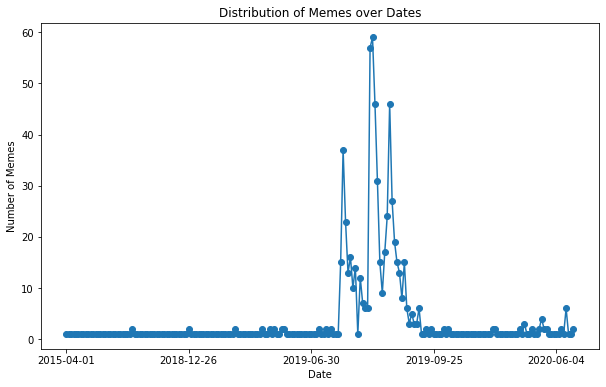

In [100]:
# Group the data by date and count the number of memes for each date
memes_by_date = data[data['Meme'] == 1].groupby('Date').size()

# Create the line plot
memes_by_date.plot(kind='line', marker='o', figsize=(10, 6))

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Number of Memes')
plt.title('Distribution of Memes over Dates')

# Show the plot
plt.show()

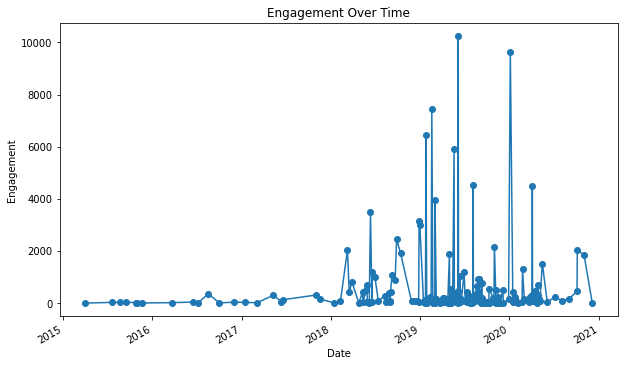

In [101]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group the data by date and calculate the average engagement
engagement_over_time = data.groupby('Date')['Engagement'].mean()

# Create the line plot
engagement_over_time.plot(kind='line', marker='o', figsize=(10, 6))

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Engagement')
plt.title('Engagement Over Time')

# Show the plot
plt.show()

In [110]:
#init spaCy
punctuations = string.punctuation
stop_words_it = spacy.lang.it.stop_words.STOP_WORDS
parser_it = Italian()

In [111]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

# Tokenizer function
def spacy_tokenizer_it(sentence):
    mytokens = parser_it(sentence)
    mytokens = [ word.text for word in mytokens ]
    # remove stop words
    mytokens = [ word for word in mytokens if word not in stop_words_it and word not in punctuations ]
    # return preprocessed list of tokens
    return mytokens

In [112]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer_it)
X = data.Text
y = data.Meme

In [113]:
# Training
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer_it)
classifier = svm.LinearSVC()
pipe = Pipeline([("cleaner", predictors()),
  ('vectorizer', tfidf_vector),
  ('classifier', classifier)])
pipe.fit(X, np.array(y))

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x00000222ACB77880>),
                ('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer_it at 0x00000222AEDFB010>)),
                ('classifier', LinearSVC())])